In [38]:
import numpy as pd
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train_df = pd.read_csv('dataset/titanic/train_titanic_799.csv')
test_df = pd.read_csv('dataset/titanic/train_titanic_800_891.csv')

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,800,0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.00,1,1,345773,24.1500,NaN,S
1,801,0,2,"Ponesell, Mr. Martin",male,34.00,0,0,250647,13.0000,NaN,S
2,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.00,1,1,C.A. 31921,26.2500,NaN,S
3,803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S
4,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  799 non-null    int64  
 1   Survived     799 non-null    int64  
 2   Pclass       799 non-null    int64  
 3   Name         799 non-null    object 
 4   Sex          799 non-null    object 
 5   Age          636 non-null    float64
 6   SibSp        799 non-null    int64  
 7   Parch        799 non-null    int64  
 8   Ticket       799 non-null    object 
 9   Fare         799 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     798 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 75.0+ KB


In [12]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            163
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          614
Embarked         1
dtype: int64

In [14]:
train_df = train_df.drop(['Cabin'], axis=1)

In [15]:
train_df = train_df.dropna()

In [17]:
train_df.shape

(635, 11)

In [18]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,400.483465,0.406299,2.229921,29.858142,0.522835,0.428346,35.900892
std,231.342150,0.491529,0.839137,14.563639,0.933447,0.855018,55.116245
min,1.000000,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,202.000000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,397.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.900000
75%,605.500000,1.000000,3.000000,38.000000,1.000000,1.000000,34.375000
max,799.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


<AxesSubplot:xlabel='Sex', ylabel='Age'>

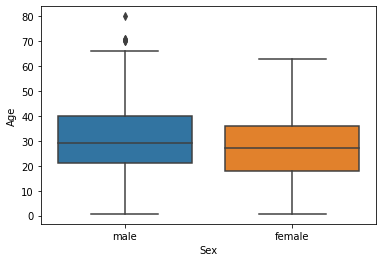

In [25]:
sns.boxplot(x=train_df['Sex'], y=train_df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

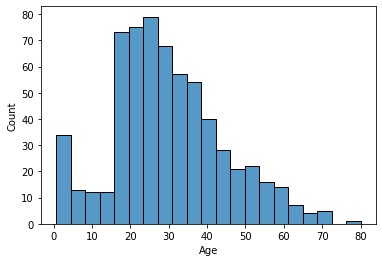

In [43]:
sns.histplot(train_df['Age'])

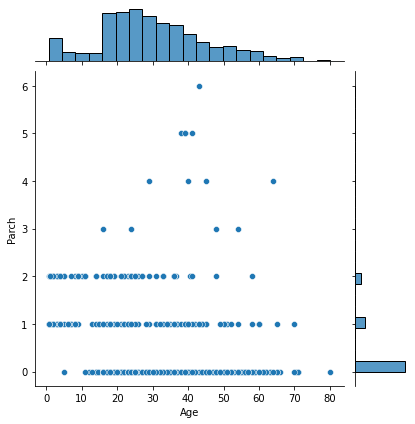

In [45]:
sns.jointplot(x='Age', y='Parch', data=train_df)

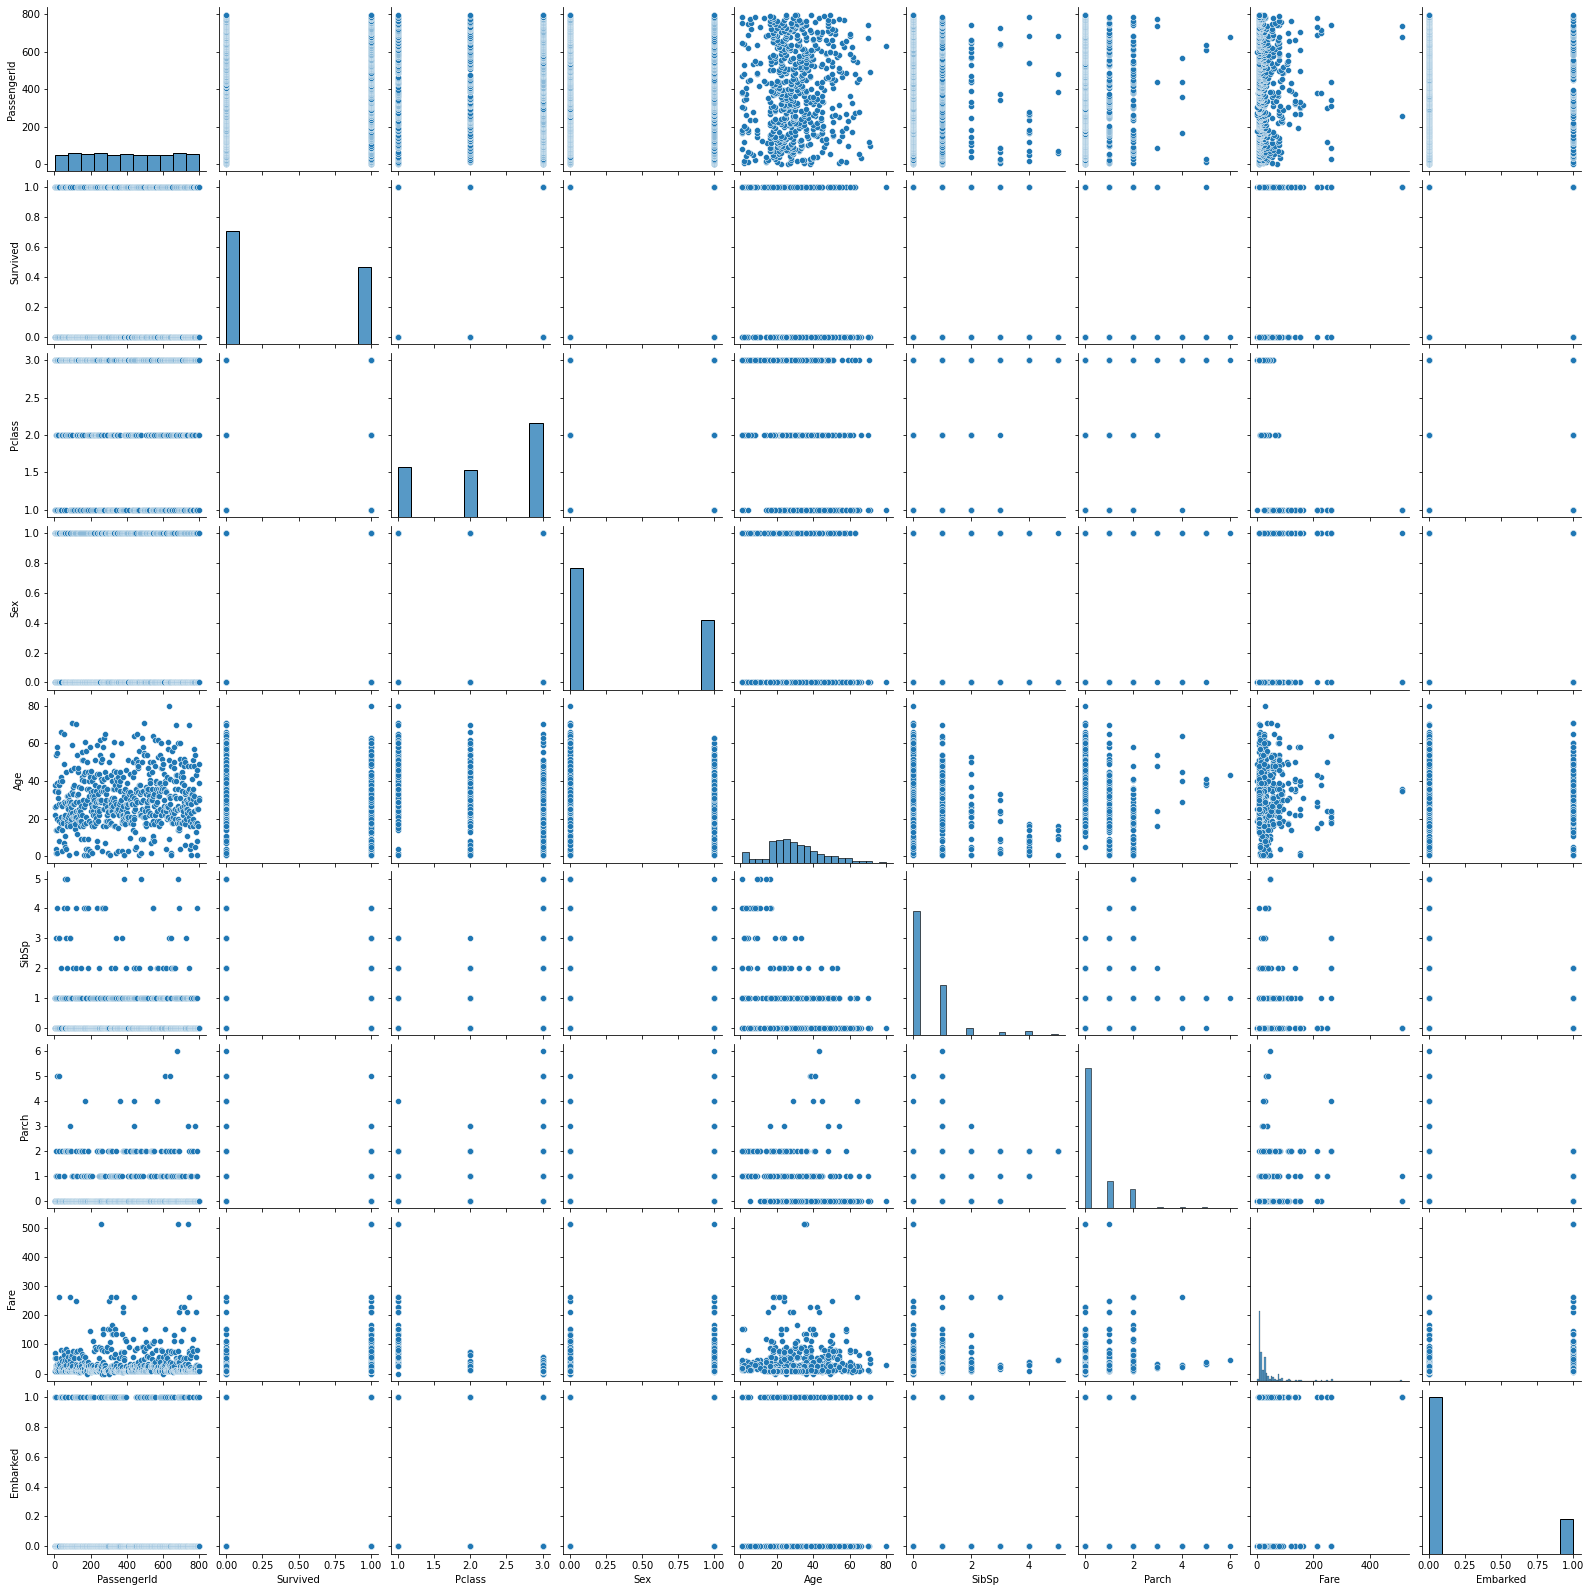

In [48]:
sns.pairplot(data=train_df)

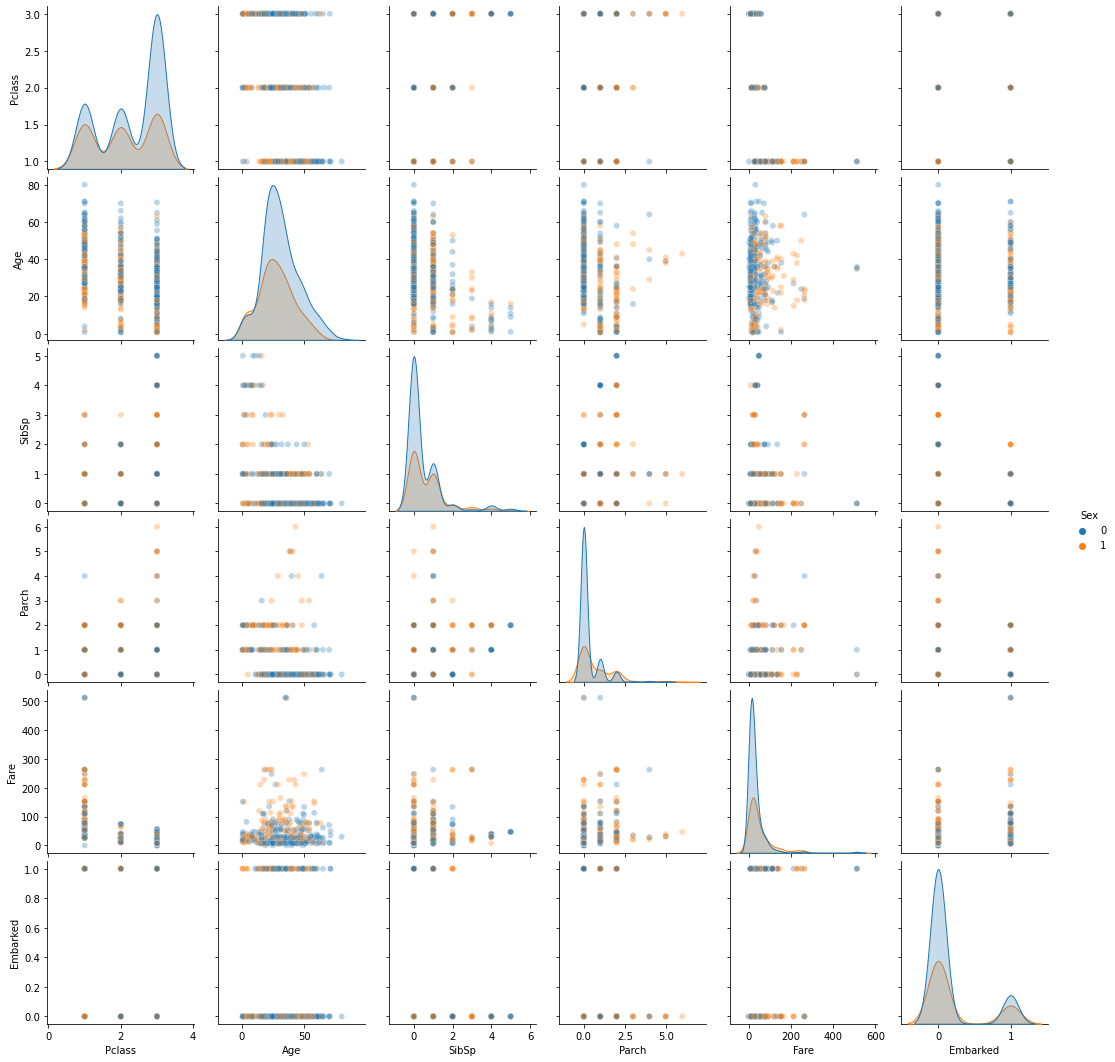

In [59]:
tgt_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


sns.pairplot(train_df[tgt_cols], hue='Sex', plot_kws={'alpha':0.3})

In [47]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [29]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'C': 1, 'Q': 0, 'S': 0})

In [34]:
from sklearn.linear_model import LogisticRegression

regressor = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

train_X = train_df[regressor]

train_y = train_df['Survived']

rl_model = LogisticRegression()
rl_model.fit(train_X, train_y)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
rl_model.score(train_X, train_y)

0.7968503937007874